# Figure 12

Below is the code used to produce Figure 12 from our paper.

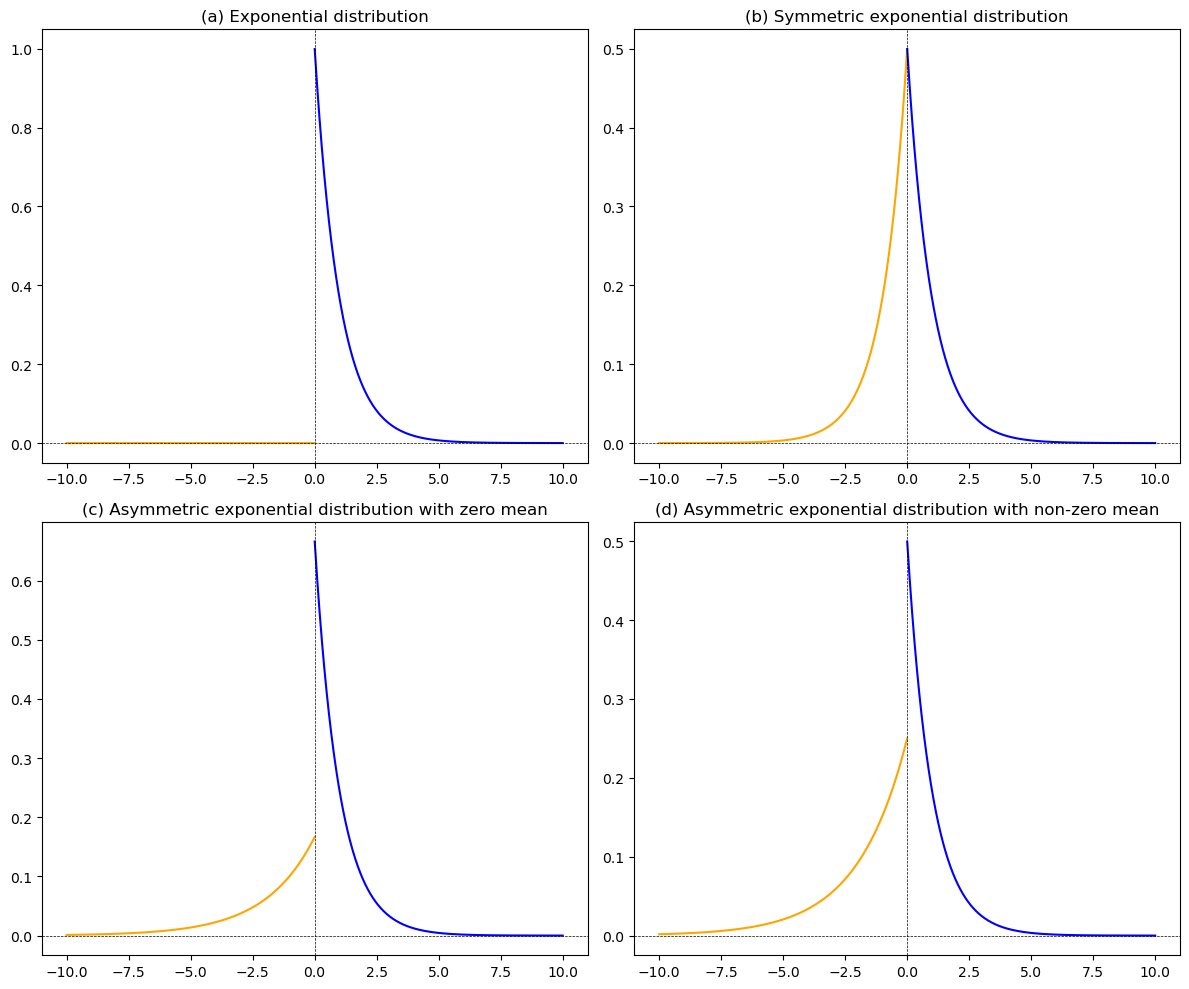

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the output based on x, p, lambda_A, and lambda_B
def mixture_density(x, p, lambda_A, lambda_B):
    if x > 0:
        return p * (lambda_B * np.exp(-lambda_B * x))
    else:
        return (1 - p) * (lambda_A * np.exp(lambda_A * x))
        

# Generate x values and compute y values using the mixture_density
x_values_negative = np.linspace(-10, -0.001, 2500)  # Slightly below 0
x_values_positive = np.linspace(0.001, 10, 2500)    # Slightly above 0

# Define the parameters for each plot
params = [
    {"p": 1, "lambda_A": 2, "lambda_B": 1, "title": "(a) Exponential distribution"},
    {"p": 1/2, "lambda_A": 1, "lambda_B": 1, "title": "(b) Symmetric exponential distribution"},
    {"p": 2/3, "lambda_A": 1/2, "lambda_B": 1, "title": "(c) Asymmetric exponential distribution with zero mean"},
    {"p": 1/2, "lambda_A": 1/2, "lambda_B": 1, "title": "(d) Asymmetric exponential distribution with non-zero mean"}
]

# Set up the subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each function in its respective subplot
for i, param in enumerate(params):
    p = param["p"]
    lambda_A = param["lambda_A"]
    lambda_B = param["lambda_B"]
    title = param["title"]

    # Calculate y values for the current parameters
    Alice_y_values = [mixture_density(x, p, lambda_A, lambda_B) for x in x_values_negative]
    Bob_y_values = [mixture_density(x, p, lambda_A, lambda_B) for x in x_values_positive]

    # Select subplot (i // 2 gives the row, i % 2 gives the column)
    ax = axes[i // 2, i % 2]
    
    # Plot in the selected subplot
    ax.plot(x_values_negative, Alice_y_values, label=title, color="orange")
    ax.plot(x_values_positive, Bob_y_values, color="blue")
    ax.set_title(title)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    # ax.set_xlabel("x")
    # ax.set_ylabel("f(x)")
    # ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()